In [5]:
import numpy as np
from scipy.stats import uniform, norm, bernoulli, t
from matplotlib import pyplot as plt


In [27]:

def test_clt(distr, sample_sizes, n_samples=10000, n_bins=25):
    for sample_size in sample_sizes:
        print("Тестирую размер выборки {}.".format(sample_size))
        sample_means = distr.rvs((n_samples, sample_size)).mean(axis=1)
        normal_approximation = norm(sample_means.mean(), sample_means.std())
        plt.rc("figure", figsize=(16, 6))

        plt.subplot(121)
        x = np.linspace(sample_means.min(), sample_means.max(), 1001)
        plt.plot(x, normal_approximation.pdf(x),
                 label="Плотность нормального приближения")
        plt.hist(sample_means, density=True, bins=n_bins,
                 label="Гистограмма получившихся значений")
        plt.title("Функция плотности")
        plt.legend()

        plt.subplot(122)
        sample_means.sort()
        empirical_cdf_vals = np.arange(0, n_samples + 1) / n_samples
        normal_cdf = normal_approximation.cdf(sample_means)
        deviation = max(
            np.abs(normal_cdf - empirical_cdf_vals[:-1]).max(),
            np.abs(normal_cdf - empirical_cdf_vals[1:]).max()
        )
        print("Отклонение эмпирической функции распределения от нормальной {}".format(deviation))
        plt.plot(sample_means, empirical_cdf_vals[1:],
                 label="Эмирическая ф-ция распределения")
        plt.plot(sample_means, normal_approximation.cdf(sample_means),
                 label="Ф-ция распределения нормального приближения")
        plt.title("Функция распределения")
        plt.legend()


        plt.show()




Тестирую размер выборки 1.
Отклонение эмпирической функции распределения от нормальной 0.059632986604860494


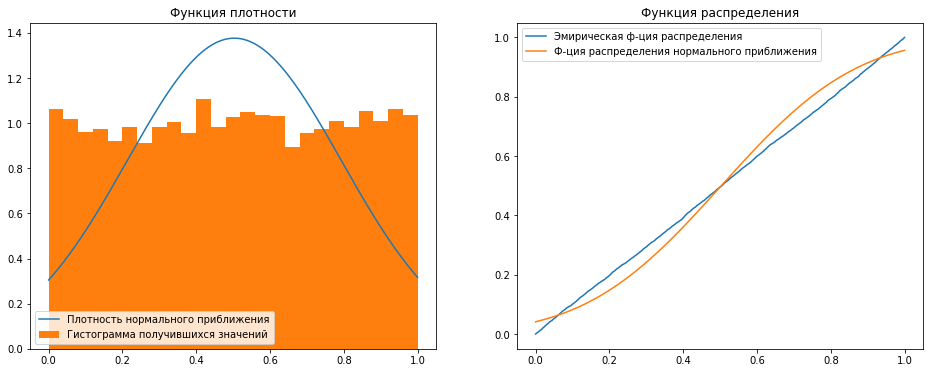

Тестирую размер выборки 2.
Отклонение эмпирической функции распределения от нормальной 0.020629916498350998


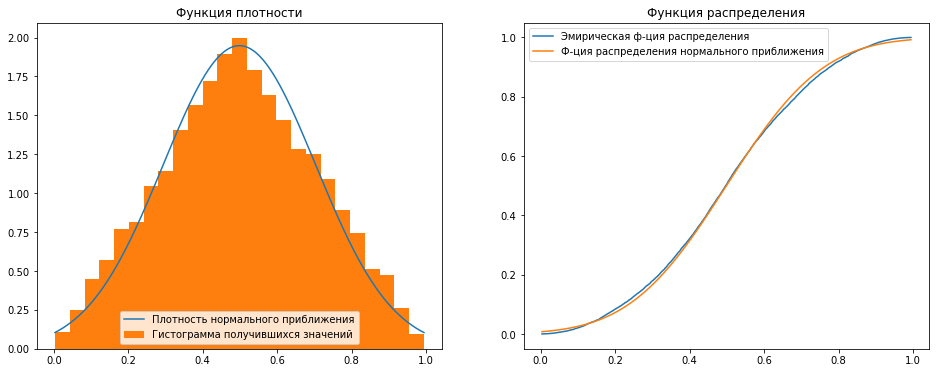

Тестирую размер выборки 3.
Отклонение эмпирической функции распределения от нормальной 0.01462358563122268


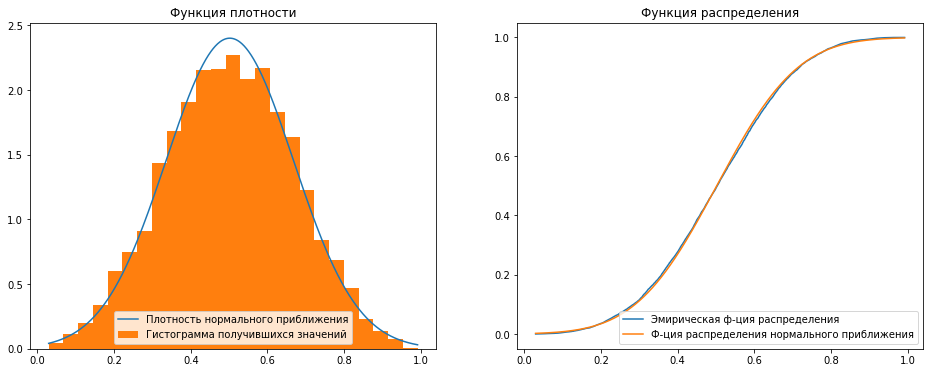

Тестирую размер выборки 5.
Отклонение эмпирической функции распределения от нормальной 0.007558960948543358


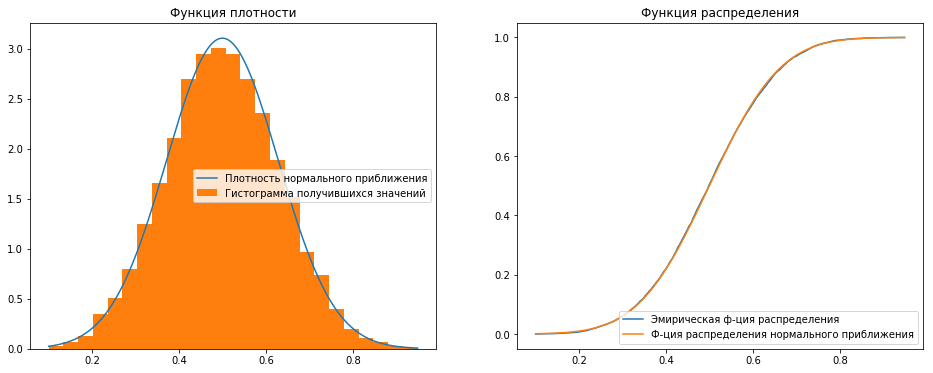

Тестирую размер выборки 10.
Отклонение эмпирической функции распределения от нормальной 0.005882258253477324


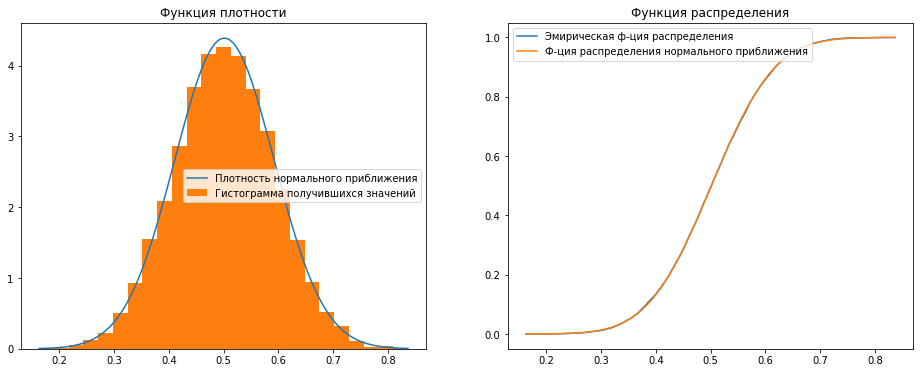

Тестирую размер выборки 20.
Отклонение эмпирической функции распределения от нормальной 0.00603623709198442


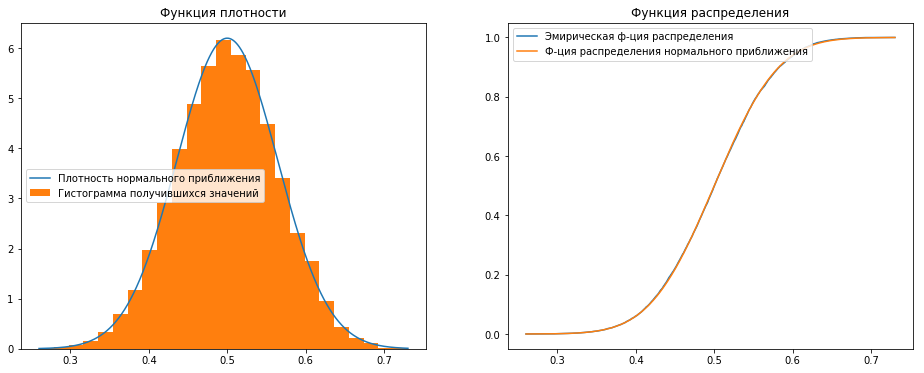

In [33]:
test_clt(uniform(), [1, 2, 3, 5, 10, 20])


Тестирую размер выборки 2.
Отклонение эмпирической функции распределения от нормальной 0.4070119202103054


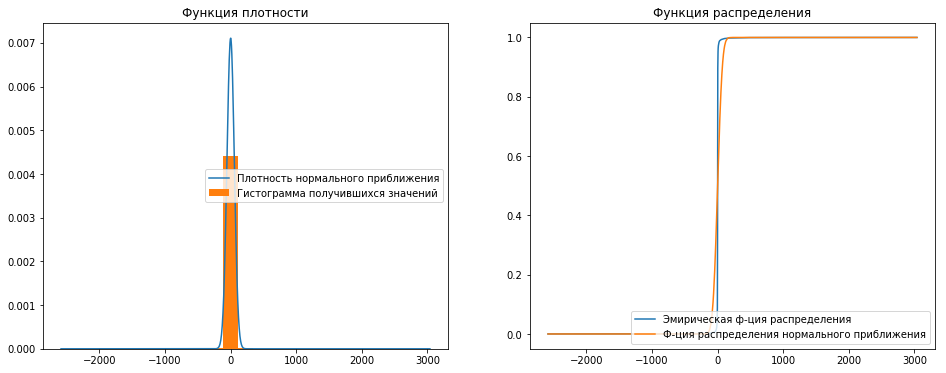

Тестирую размер выборки 5.
Отклонение эмпирической функции распределения от нормальной 0.38520762718332674


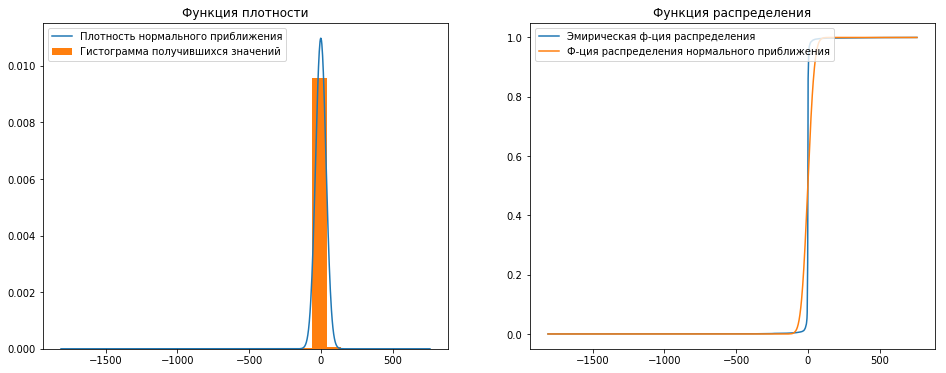

Тестирую размер выборки 20.
Отклонение эмпирической функции распределения от нормальной 0.46321302011321375


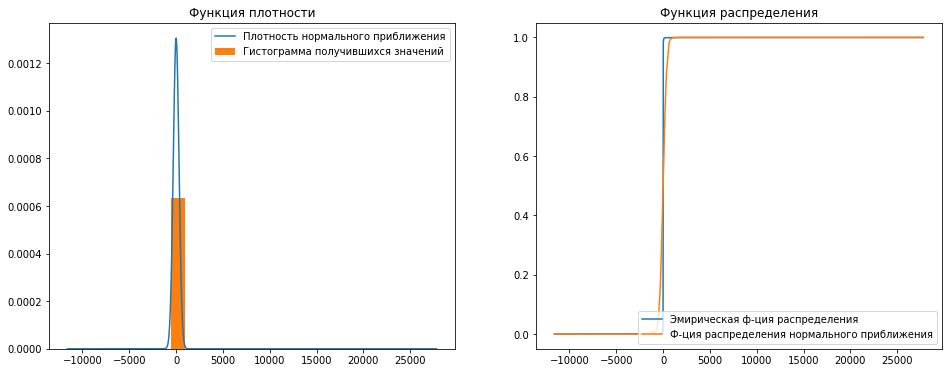

Тестирую размер выборки 100.
Отклонение эмпирической функции распределения от нормальной 0.4532612400287794


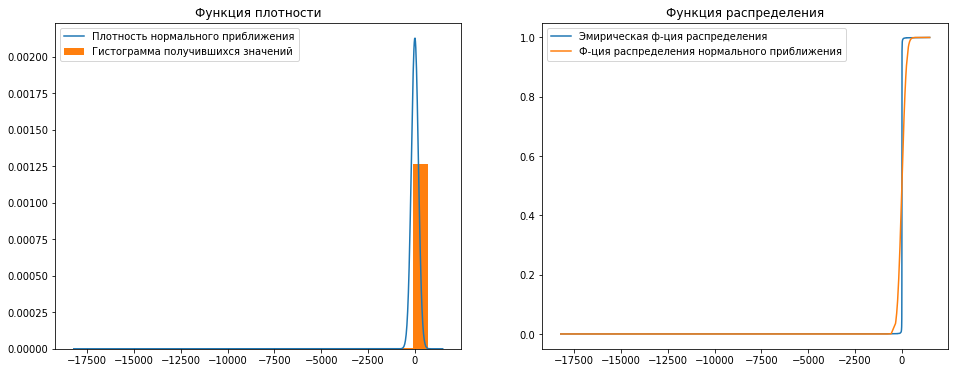

Тестирую размер выборки 1000.
Отклонение эмпирической функции распределения от нормальной 0.4387992249685013


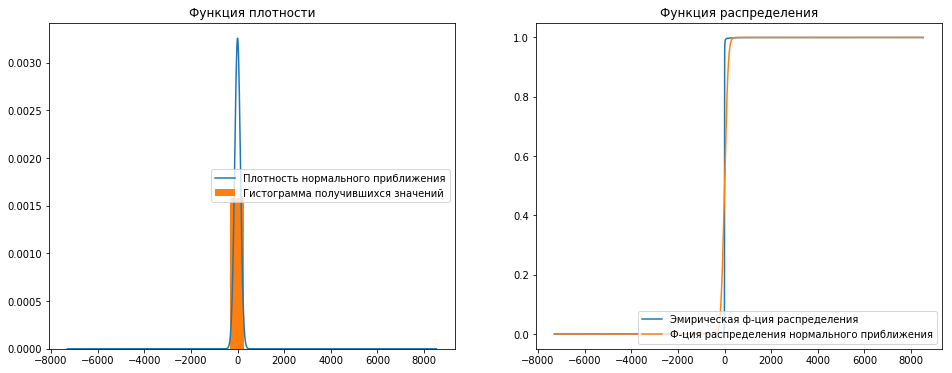

In [34]:
test_clt(t(1), [2, 5, 20, 100, 1000])
